In [1]:
import pandas as pd
import numpy as np
import copy

from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import f1_score,accuracy_score,classification_report

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

## Methods used

In [2]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    return xx, yy

def custom_cv_kfolds(X,kFold):
    n, i = X.shape[0], 1
    while(i<=kFold): 
        idx = np.arange(n * (i - 1) / kFold, n * i / kFold, dtype=int)
        yield idx, idx
        i += 1

def getKFoldPartitions(X,Y,K): # X=dataX_train,Y=yTrain not dataY_train
    partitions_x, partitions_y = [], []
    for indices in custom_cv_kfolds(X,K):  # gets indices of partitions
        temp_X, temp_Y = [], []
        for i in indices[0]:
            temp_X.append(X[i])
            temp_Y.append(Y[i])  # yTrain, not dataY_train
        partitions_x.append(temp_X)
        partitions_y.append(temp_Y)
    return partitions_x, partitions_y

def modifyClasses(classNumber, Y):
    for i in range(0, len(Y)):
        if (Y[i] == classNumber):
            Y[i] = 1
        else:
            Y[i] = 0
    return Y

def plotBoundary(X,Y,model):
    Y = np.asarray(Y)
    X0, X1= X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
#     plt.scatter(X0, X1, c=Y)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plot_decision_regions(X, Y, model, legend=2)
    plt.show()

def OVRTrain(X,Y):
    classifiers, train_scores, train_accuracy = [], [], []
     
    for classNumber in range(0, len(data_classes)):
        print('Class:', classNumber)
        yTrain=copy.deepcopy(Y)
        newY = modifyClasses(classNumber, yTrain)

        model = svm.SVC(kernel='linear')
        model.fit(X, newY)
        
        name='Linear Kernel,OVR, class-'+str(classNumber)
        plt.title(name)
        plotBoundary(X,newY,model)
        
        trainScore = model.score(X, newY)
        yPred= model.predict(X)
        trainAccuracy=accuracy_score(newY, yPred)
        
        classifiers.append(model)
        train_scores.append(trainScore)
        train_accuracy.append(trainAccuracy)
        
    return classifiers, train_scores, train_accuracy

def OVRValidation(X,Y,classifiers):
    validation_scores, validation_accuracies=[], []
    for classNumber in range(0, len(data_classes)):
        yTrain=copy.deepcopy(Y)
        newY = modifyClasses(classNumber, yTrain)

        validationScore = classifiers[classNumber].score(X, newY)
        yPred= classifiers[classNumber].predict(X)
        validationAccuracy=accuracy_score(newY, yPred)
        
        validation_scores.append(validationScore)
        validation_accuracies.append(validationAccuracy)
    return validation_scores, validation_accuracies

def OVRTest(X,Y,classifiers):
    test_scores, test_accuracies=[], []
    for classNumber in range(0, len(data_classes)):
        yTrain=copy.deepcopy(Y)
        newY = modifyClasses(classNumber, yTrain)

        testScore = classifiers[classNumber].score(X, newY)
        yPred= classifiers[classNumber].predict(X)
        testAccuracy=accuracy_score(newY, yPred)
        
        test_scores.append(testScore)
        test_accuracies.append(testAccuracy)
    return test_scores, test_accuracies

def accuracy(X,Y,model):
    yPred=model.predict(X)
    acc=accuracy_score(Y,yPred)
    print(classification_report(Y,yPred))
    return acc

def printScores(train_scores,validation_scores,test_scores):
    print('\nScores:')
    for i in range(len(train_scores)):
        print('Class:',i,'\tTrainScore:',train_scores[i],' ValidationScore:', validation_scores[i],' TestScore:',test_scores[i])
    print()
        
def printAccuracies(train_acc,validation_acc,test_acc):
    print('\nAccuracies')
    for i in range(len(train_acc)):
        print('Class:',i,'\tTrainAcc:',train_acc[i],' ValidationAcc:', validation_acc[i],' TestAcc:',test_acc[i])
    print()
    
KFold = 10

### IRIS Dataset

In [3]:
data=pd.read_csv(r"C:\Users\Subhani\Documents\Jupyter AML\Assignments\Assignment_2\iris\iris-species\iris.csv")
data_classes={'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}

data_X=data.iloc[:,1:5].values
data_X=data.iloc[:,1:3].values ######## taken first 2 features
# pca = PCA(n_components=2)
# data_X=pca.fit_transform(data_X)

data_Y_names=data.iloc[:,5].values

data_Y=[]
for i in data_Y_names:
    data_Y.append(data_classes[i])

dataX_train, dataX_test, dataY_train, dataY_test = train_test_split(data_X, data_Y, test_size=0.2,random_state=20)
dataX_train.shape

(120, 2)

### Linear Kernel

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.74      0.79      0.77        39
           2       0.78      0.72      0.75        39

   micro avg       0.84      0.84      0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.64      0.64      0.64        11
           2       0.64      0.64      0.64        11

   micro avg       0.73      0.73      0.73        30
   macro avg       0.76      0.76      0.76        30
weighted avg       0.73      0.73      0.73        30


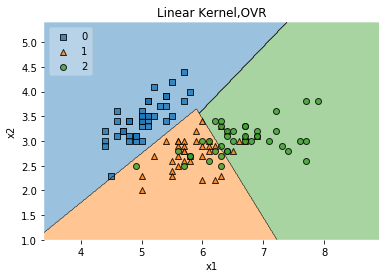

In [4]:
linearModel=svm.SVC(kernel='linear')
linearModel.fit(dataX_train, dataY_train)
print(linearModel)

trainAccuracy = accuracy(dataX_train, dataY_train, linearModel)
testAccuracy = accuracy(dataX_test, dataY_test, linearModel)
print('Train Accuracy:',trainAccuracy,'\nTest Accuracy:',testAccuracy)

X, Y = dataX_train, np.asarray(dataY_train)
name='Linear Kernel,OVR'
plt.title(name)
plotBoundary(X,Y,linearModel)

### OVA , KFold



******************************K= 1 ******************************
Class: 0


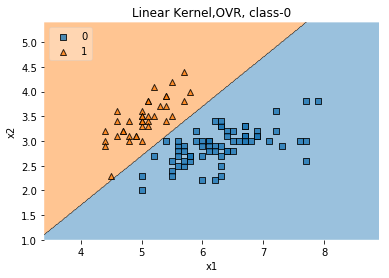

Class: 1


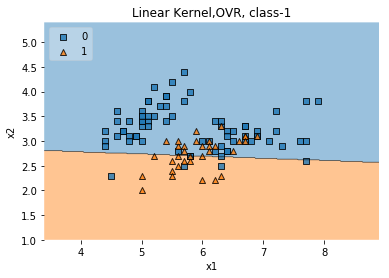

Class: 2


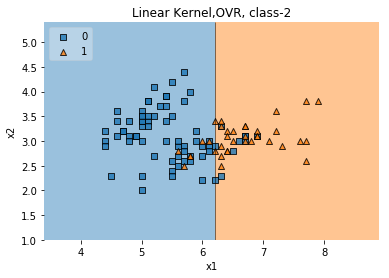


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.7592592592592593  ValidationScore: 0.4166666666666667  TestScore: 0.7666666666666667
Class: 2 	TrainScore: 0.8518518518518519  ValidationScore: 0.75  TestScore: 0.7333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.7592592592592593  ValidationAcc: 0.4166666666666667  TestAcc: 0.7666666666666667
Class: 2 	TrainAcc: 0.8518518518518519  ValidationAcc: 0.75  TestAcc: 0.7333333333333333



******************************K= 2 ******************************
Class: 0


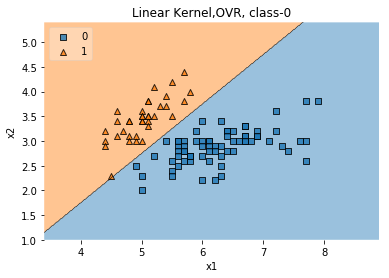

Class: 1


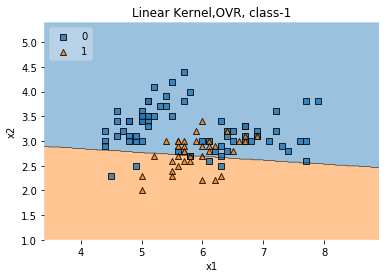

Class: 2


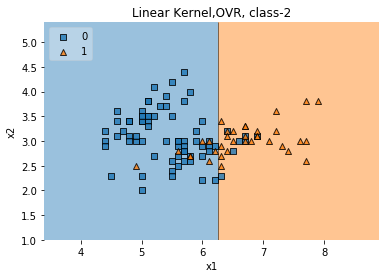


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.7314814814814815  ValidationScore: 0.75  TestScore: 0.7666666666666667
Class: 2 	TrainScore: 0.8611111111111112  ValidationScore: 0.6666666666666666  TestScore: 0.7333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.7314814814814815  ValidationAcc: 0.75  TestAcc: 0.7666666666666667
Class: 2 	TrainAcc: 0.8611111111111112  ValidationAcc: 0.6666666666666666  TestAcc: 0.7333333333333333



******************************K= 3 ******************************
Class: 0


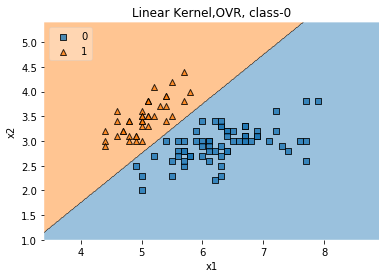

Class: 1


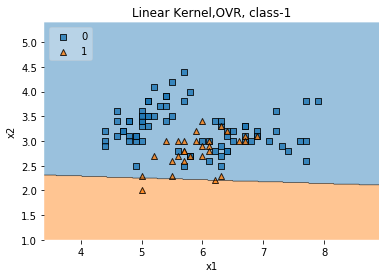

Class: 2


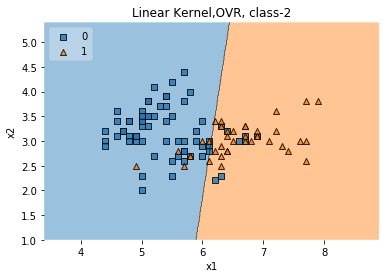


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.75  ValidationScore: 0.25  TestScore: 0.6
Class: 2 	TrainScore: 0.8611111111111112  ValidationScore: 0.75  TestScore: 0.7333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.75  ValidationAcc: 0.25  TestAcc: 0.6
Class: 2 	TrainAcc: 0.8611111111111112  ValidationAcc: 0.75  TestAcc: 0.7333333333333333



******************************K= 4 ******************************
Class: 0


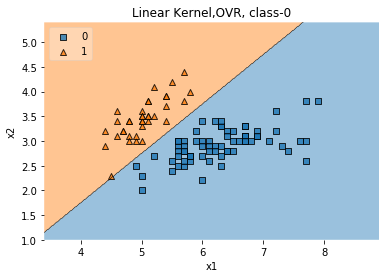

Class: 1


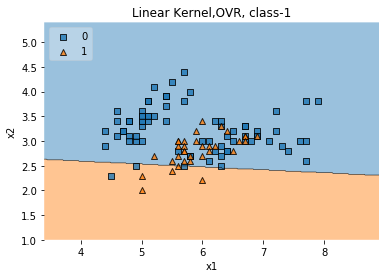

Class: 2


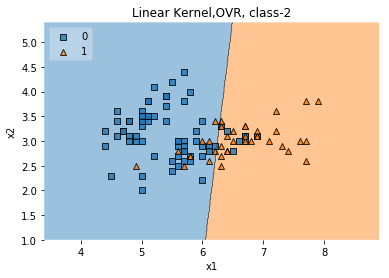


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.7037037037037037  ValidationScore: 0.8333333333333334  TestScore: 0.7333333333333333
Class: 2 	TrainScore: 0.8333333333333334  ValidationScore: 0.8333333333333334  TestScore: 0.7333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.7037037037037037  ValidationAcc: 0.8333333333333334  TestAcc: 0.7333333333333333
Class: 2 	TrainAcc: 0.8333333333333334  ValidationAcc: 0.8333333333333334  TestAcc: 0.7333333333333333



******************************K= 5 ******************************
Class: 0


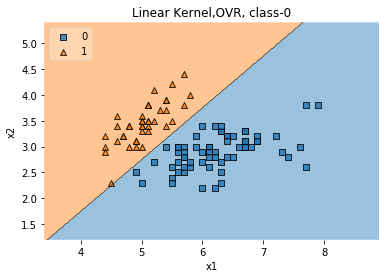

Class: 1


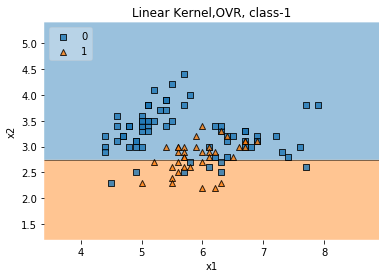

Class: 2


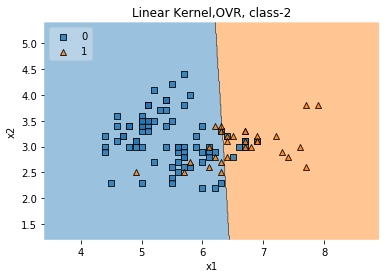


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.7037037037037037  ValidationScore: 0.9166666666666666  TestScore: 0.7333333333333333
Class: 2 	TrainScore: 0.8333333333333334  ValidationScore: 0.6666666666666666  TestScore: 0.7333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.7037037037037037  ValidationAcc: 0.9166666666666666  TestAcc: 0.7333333333333333
Class: 2 	TrainAcc: 0.8333333333333334  ValidationAcc: 0.6666666666666666  TestAcc: 0.7333333333333333



******************************K= 6 ******************************
Class: 0


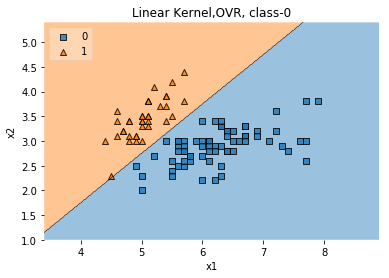

Class: 1


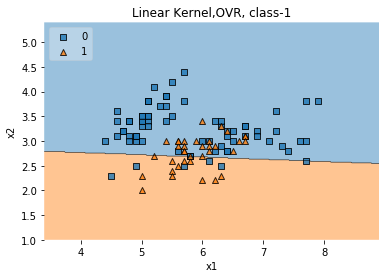

Class: 2


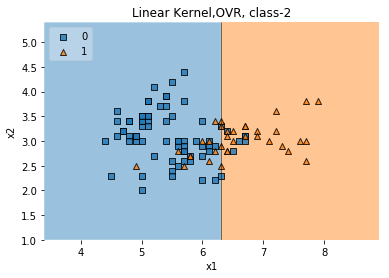


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.7314814814814815  ValidationScore: 0.75  TestScore: 0.7333333333333333
Class: 2 	TrainScore: 0.8240740740740741  ValidationScore: 0.8333333333333334  TestScore: 0.7333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.7314814814814815  ValidationAcc: 0.75  TestAcc: 0.7333333333333333
Class: 2 	TrainAcc: 0.8240740740740741  ValidationAcc: 0.8333333333333334  TestAcc: 0.7333333333333333



******************************K= 7 ******************************
Class: 0


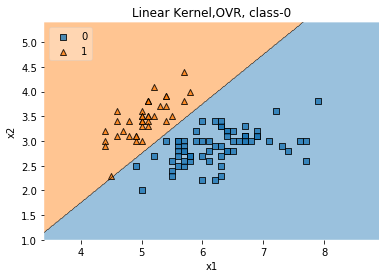

Class: 1


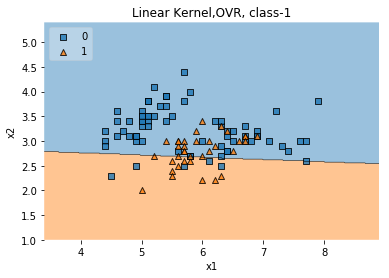

Class: 2


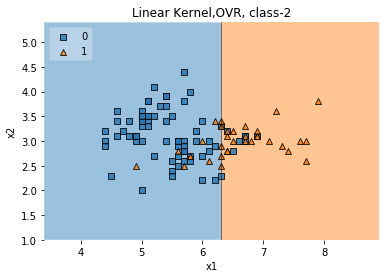


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.7222222222222222  ValidationScore: 0.8333333333333334  TestScore: 0.7333333333333333
Class: 2 	TrainScore: 0.8425925925925926  ValidationScore: 0.8333333333333334  TestScore: 0.7333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.7222222222222222  ValidationAcc: 0.8333333333333334  TestAcc: 0.7333333333333333
Class: 2 	TrainAcc: 0.8425925925925926  ValidationAcc: 0.8333333333333334  TestAcc: 0.7333333333333333



******************************K= 8 ******************************
Class: 0


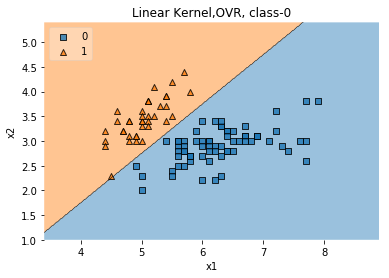

Class: 1


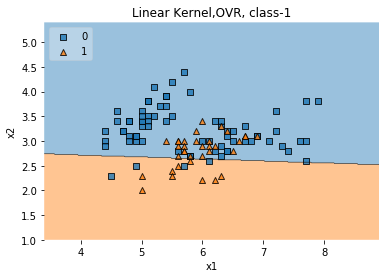

Class: 2


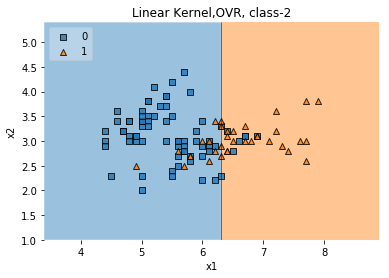


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.7222222222222222  ValidationScore: 0.75  TestScore: 0.7333333333333333
Class: 2 	TrainScore: 0.8240740740740741  ValidationScore: 0.9166666666666666  TestScore: 0.7333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.7222222222222222  ValidationAcc: 0.75  TestAcc: 0.7333333333333333
Class: 2 	TrainAcc: 0.8240740740740741  ValidationAcc: 0.9166666666666666  TestAcc: 0.7333333333333333



******************************K= 9 ******************************
Class: 0


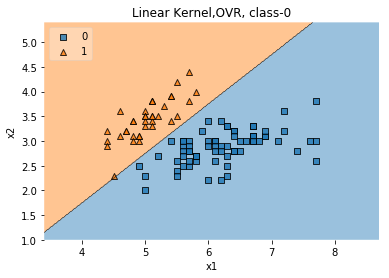

Class: 1


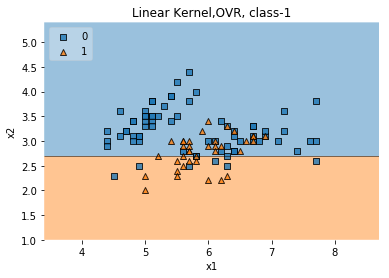

Class: 2


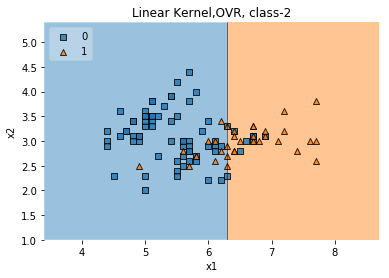


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.7037037037037037  ValidationScore: 0.9166666666666666  TestScore: 0.7333333333333333
Class: 2 	TrainScore: 0.8055555555555556  ValidationScore: 1.0  TestScore: 0.7333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.7037037037037037  ValidationAcc: 0.9166666666666666  TestAcc: 0.7333333333333333
Class: 2 	TrainAcc: 0.8055555555555556  ValidationAcc: 1.0  TestAcc: 0.7333333333333333



******************************K= 10 ******************************
Class: 0


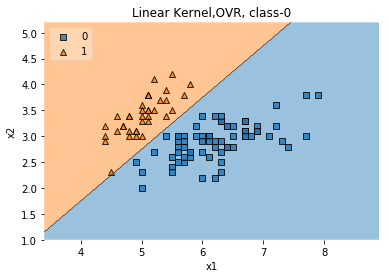

Class: 1


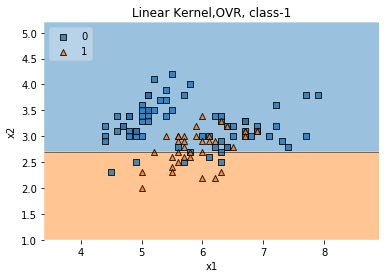

Class: 2


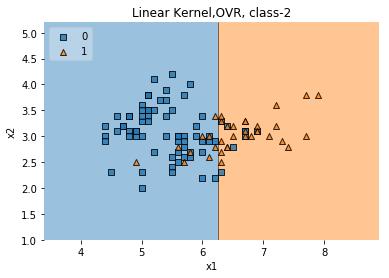


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.7407407407407407  ValidationScore: 0.5833333333333334  TestScore: 0.7333333333333333
Class: 2 	TrainScore: 0.8425925925925926  ValidationScore: 0.8333333333333334  TestScore: 0.7333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.7407407407407407  ValidationAcc: 0.5833333333333334  TestAcc: 0.7333333333333333
Class: 2 	TrainAcc: 0.8425925925925926  ValidationAcc: 0.8333333333333334  TestAcc: 0.7333333333333333



 Mean Scores and Accuracies: 
Train Score mean: [0.87037037 0.86419753 0.87037037 0.84567901 0.84567901 0.85185185
 0.85493827 0.84876543 0.83641975 0.86111111] 
Validation Score mean: [0.72222222 0.80555556 0.66666667 0.88888889 0.86111111 0.86111111
 0.88888889 0.88888889 0.97222222 0.80555556] \Test Score mean: [0.83333333 0.83333333 0.77777778 0.82222222 0.82222222 0.82222222
 0.82222222 0.82222222 0.82222222 0.82222222] 

In [5]:
partitions_x, partitions_y = getKFoldPartitions(dataX_train,dataY_train,KFold)

train_scores_mean, validation_scores_mean, test_scores_mean=[], [], []
train_accuracies_mean, validation_accuracies_mean, test_accuracies_mean=[], [], []
classifiers_all=[]
for partition in range(0, KFold):  # each fold training,validation and testing
    print('\n\n******************************K=',partition+1,'******************************')
    validationBlock = partition
    temp_X, temp_Y = [], []
    for block in range(0, KFold):
        if (block == validationBlock):
            continue
        temp_X.append(partitions_x[block])
        temp_Y.append(partitions_y[block])

    X_input_train = np.concatenate(temp_X, axis=0)
    Y_input_train = np.concatenate(temp_Y, axis=0)
    X_input_validation = np.asarray(partitions_x[validationBlock])
    Y_input_validation = np.asarray(partitions_y[validationBlock])
    
    classifiers, train_scores,train_accuracies=OVRTrain(X_input_train,Y_input_train)
    validation_scores, validation_accuracies = OVRValidation(X_input_validation, Y_input_validation, classifiers)
    test_scores, test_accuracies= OVRTest(dataX_test,dataY_test,classifiers)
    
    classifiers_all.append(classifiers) # Models for each K
    train_scores_mean.append(train_scores) # train scores of each Model for each K
    train_accuracies_mean.append(train_accuracies) # train accuracies of each Model for each K
    
    validation_scores_mean.append(validation_scores) # Validation scores of each Model for each K
    validation_accuracies_mean.append(validation_accuracies) # Validation accuracies of each Model for each K
    
    test_scores_mean.append(test_scores)
    test_accuracies_mean.append(test_accuracies)
    
    printScores(train_scores,validation_scores,test_scores)
    printAccuracies(train_accuracies,validation_accuracies,test_accuracies)
    
train_scores_mean = np.asarray(train_scores_mean)
train_accuracies_mean = np.asarray(train_accuracies_mean)

validation_scores_mean = np.asarray(validation_scores_mean)
validation_accuracies_mean = np.asarray(validation_accuracies_mean)

test_scores_mean = np.asarray(test_scores_mean)
test_accuracies_mean = np.asarray(test_accuracies_mean)

print('\n\n Mean Scores and Accuracies:',
      '\nTrain Score mean:',np.mean(train_scores_mean,axis=1),
      '\nValidation Score mean:',np.mean(validation_scores_mean,axis=1),
      '\Test Score mean:',np.mean(test_scores_mean,axis=1),
      '\nTrain Accuracy mean:',np.mean(train_accuracies_mean,axis=1),
      '\nValidation Accuracy mean:',np.mean(validation_accuracies_mean,axis=1),
      '\nTest Accuracy mean:',np.mean(test_accuracies_mean,axis=1))

### OVA without KFold



------------------------Class: 0 ------------------------

Train Score: 1.0  Test Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        42

   micro avg       1.00      1.00      1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



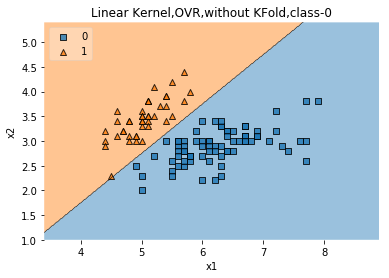



------------------------Class: 1 ------------------------

Train Score: 0.7333333333333333  Test Score: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        81
           1       0.71      0.31      0.43        39

   micro avg       0.73      0.73      0.73       120
   macro avg       0.72      0.62      0.63       120
weighted avg       0.73      0.73      0.70       120

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        19
           1       0.71      0.45      0.56        11

   micro avg       0.73      0.73      0.73        30
   macro avg       0.73      0.67      0.68        30
weighted avg       0.73      0.73      0.72        30



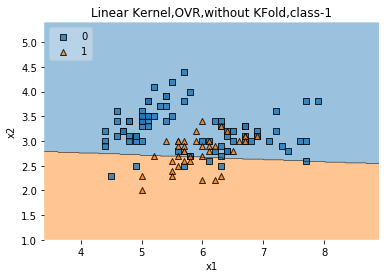



------------------------Class: 2 ------------------------

Train Score: 0.8416666666666667  Test Score: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        81
           1       0.76      0.74      0.75        39

   micro avg       0.84      0.84      0.84       120
   macro avg       0.82      0.82      0.82       120
weighted avg       0.84      0.84      0.84       120

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.62      0.73      0.67        11

   micro avg       0.73      0.73      0.73        30
   macro avg       0.72      0.73      0.72        30
weighted avg       0.75      0.73      0.74        30



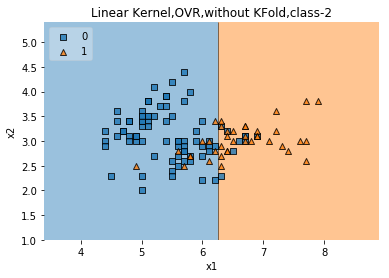

In [6]:
for classNumber in range(0, len(data_classes)):
    print('\n\n------------------------Class:', classNumber,'------------------------\n')
    yTrain, yTest = copy.deepcopy(dataY_train), copy.deepcopy(dataY_test)
    yTrain = modifyClasses(classNumber, yTrain)
    yTest = modifyClasses(classNumber, yTest)

    linear = svm.SVC(kernel='linear')
    linear.fit(dataX_train, yTrain)

    trainScore = linear.score(dataX_train, yTrain)
    testScore = linear.score(dataX_test, yTest)  # yTest(modified), not dataY_test
    
    print('Train Score:',trainScore, ' Test Score:',testScore)
    trainAccuracy = accuracy(dataX_train, yTrain,linear)
    testAccuracy = accuracy(dataX_test,yTest,linear)
    
    X, Y = dataX_train, np.asarray(yTrain)
    name='Linear Kernel,OVR,without KFold,class-'+str(classNumber)
    plt.title(name)
    plotBoundary(X,Y,linear)

### OVR , default CV(cross_val_score)



------------------------Class: 0 ------------------------

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train Score: 1.0  Test Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        42

   micro avg       1.00      1.00      1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



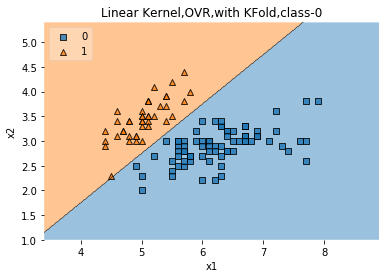



------------------------Class: 1 ------------------------

[0.53846154 0.66666667 0.66666667 0.75       0.83333333 0.91666667
 0.75       0.66666667 0.75       0.63636364]
Train Score: 0.7333333333333333  Test Score: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        81
           1       0.71      0.31      0.43        39

   micro avg       0.73      0.73      0.73       120
   macro avg       0.72      0.62      0.63       120
weighted avg       0.73      0.73      0.70       120

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        19
           1       0.71      0.45      0.56        11

   micro avg       0.73      0.73      0.73        30
   macro avg       0.73      0.67      0.68        30
weighted avg       0.73      0.73      0.72        30



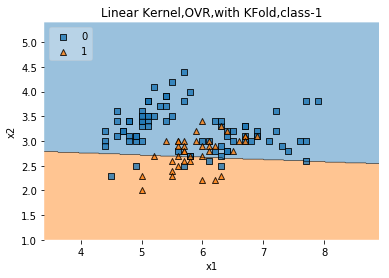



------------------------Class: 2 ------------------------

[0.69230769 0.75       0.75       0.66666667 1.         0.75
 1.         0.91666667 0.91666667 0.90909091]
Train Score: 0.8416666666666667  Test Score: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        81
           1       0.76      0.74      0.75        39

   micro avg       0.84      0.84      0.84       120
   macro avg       0.82      0.82      0.82       120
weighted avg       0.84      0.84      0.84       120

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.62      0.73      0.67        11

   micro avg       0.73      0.73      0.73        30
   macro avg       0.72      0.73      0.72        30
weighted avg       0.75      0.73      0.74        30



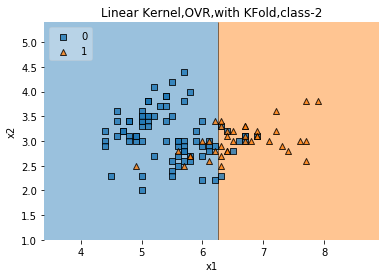

In [7]:
for classNumber in range(0, len(data_classes)):
    print('\n\n------------------------Class:', classNumber,'------------------------\n')
    yTrain, yTest = copy.deepcopy(dataY_train), copy.deepcopy(dataY_test)
    yTrain = modifyClasses(classNumber, yTrain)
    yTest = modifyClasses(classNumber, yTest)

    linearDefault=svm.SVC(kernel='linear')
    linearDefault.fit(dataX_train,yTrain)
    scores=cross_val_score(linearDefault,dataX_train,yTrain,cv=KFold)
    print(scores)
    
    trainScore = linearDefault.score(dataX_train, yTrain)
    testScore = linearDefault.score(dataX_test, yTest)  # yTest(modified), not dataY_test

    print('Train Score:',trainScore, ' Test Score:',testScore)
    trainAccuracy = accuracy(dataX_train, yTrain,linearDefault)
    testAccuracy = accuracy(dataX_test,yTest,linearDefault)

    X, Y = dataX_train, np.asarray(yTrain)
    name='Linear Kernel,OVR,with KFold,class-'+str(classNumber)
    plt.title(name)
    plotBoundary(X,Y,linearDefault)